# 1. Importamos las librerias necesarias 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 2. Extraemos los datos y eliminamos la columna 'Id' que es irrelevante para el estudio. 
Los metadatos de nuestro conjunto de datos son:

Input variables (based on physicochemical tests):\
1 - fixed acidity\ Acidez
2 - volatile acidity\ Volatilidad
3 - citric acid\ Ácido cítrico
4 - residual sugar\ Azúcar residual
5 - chlorides\ Cloruros
6 - free sulfur dioxide\ Dióxido sulfúrico libre
7 - total sulfur dioxide\ Dióxido sulfúrico total
8 - density\ Densidad
9 - pH\ 
10 - sulphates\ Sulfatos
11 - alcohol\ Alcohol
Output variable (based on sensory data):\
12 - quality (score between 0 and 10) Calidad

Tenemos 11 variables predictoras y 1 variable objetivo.

In [2]:
vino= pd.read_csv ('WineQT.csv')
vino.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


# 3. Vemos si hay valores duplicados. En este caso, no hay valores duplicados

In [3]:
colum_duplicadas= vino[vino.duplicated()]
print(colum_duplicadas)

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []


In [3]:
del vino['Id']

In [ ]:
vino.shape

(1143, 12)

# 4. Vamos a ver qué tipo de datos tenemos (numéricos o culitativos), y si hay datos faltantes o nulos


In [ ]:
vino.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
vino.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Con esta fórmula podemos ver el % de valores nulos
round(vino.isnull().sum()/len(vino.index), 2)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

5. Estudiamos la variable calidad

In [ ]:
vino['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# 5. Nos podemos plantear el problema con respecto a la calidad de manera que:
      - Sea un problema multiclase.
      - Sea un problema de regresión, pudiendo predecir la calidad acorde a una regresión entre varios valores.
      - Sea un problema binario. Catalogamos los vinos según 2 tipos de calidad 'buena' o 'mala', acorde a un criterio binario de dicha variable. Siendo los vinos de 'buena' calidad, aquellos que su valor de quality sea >= 6, ya que los distintos valores que tenemos de quality son 5, 6, 7, 4, 8, 3
En este ejemplo, vamos a considerar el problema como binario.

In [ ]:
vino['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Lo que hacemos es transformamos la variable calidad en 2 valores binarios 0 significará baja calidad y 1 significará buena calidad

In [4]:
# Mediante una lista por comprensión hacemos esta transformación de la variable a binaria
vino['quality']= [ 0 if q < 6 else 1 for q in vino['quality']]


In [ ]:
vino['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

Vamos a graficar esta proporción  de la calidad, mediante un gráfico de tarta

([<matplotlib.patches.Wedge at 0x23e1302afe0>,
 [Text(-0.15055353364867147, 1.0997425305524464, 'Bueno'),
  Text(0.15055343068334423, -1.0997425446482807, 'Malo')],
 [Text(-0.08273662659972034, 0.6043630122855786, '54.3%'),
  Text(0.08273657001517115, -0.6043630200319379, '45.7%')])

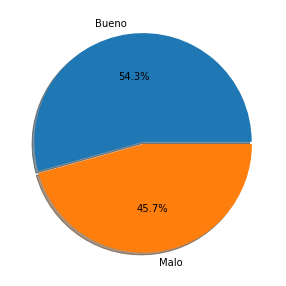

In [ ]:
porcentaje= vino['quality'].value_counts(normalize=True)

fig, ax= plt.subplots (figsize= (5,5))
ax.pie(porcentaje, labels=['Bueno', 'Malo'], autopct='%1.1f%%', shadow=True, explode=(0.01, 0.01))

#  6. Vemos la distribución de las variables, mediante histogramas

C:\Users\roosf\AppData\Local\Temp\ipykernel_15860\2201897261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['alcohol'], hist= True, kde =True)


<AxesSubplot: xlabel='alcohol', ylabel='Density'>

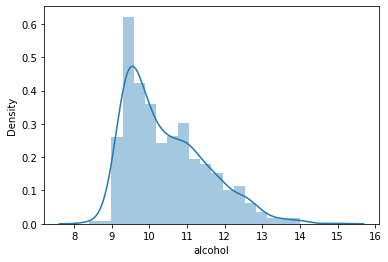

In [5]:
sns.distplot(vino['alcohol'], hist= True, kde =True)

C:\Users\roosf\AppData\Local\Temp\ipykernel_18720\1318319736.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino[c], hist=True, kde=True, ax= ax[i, j])
C:\Users\roosf\AppData\Local\Temp\ipykernel_18720\1318319736.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino[c], hist=True, kde=

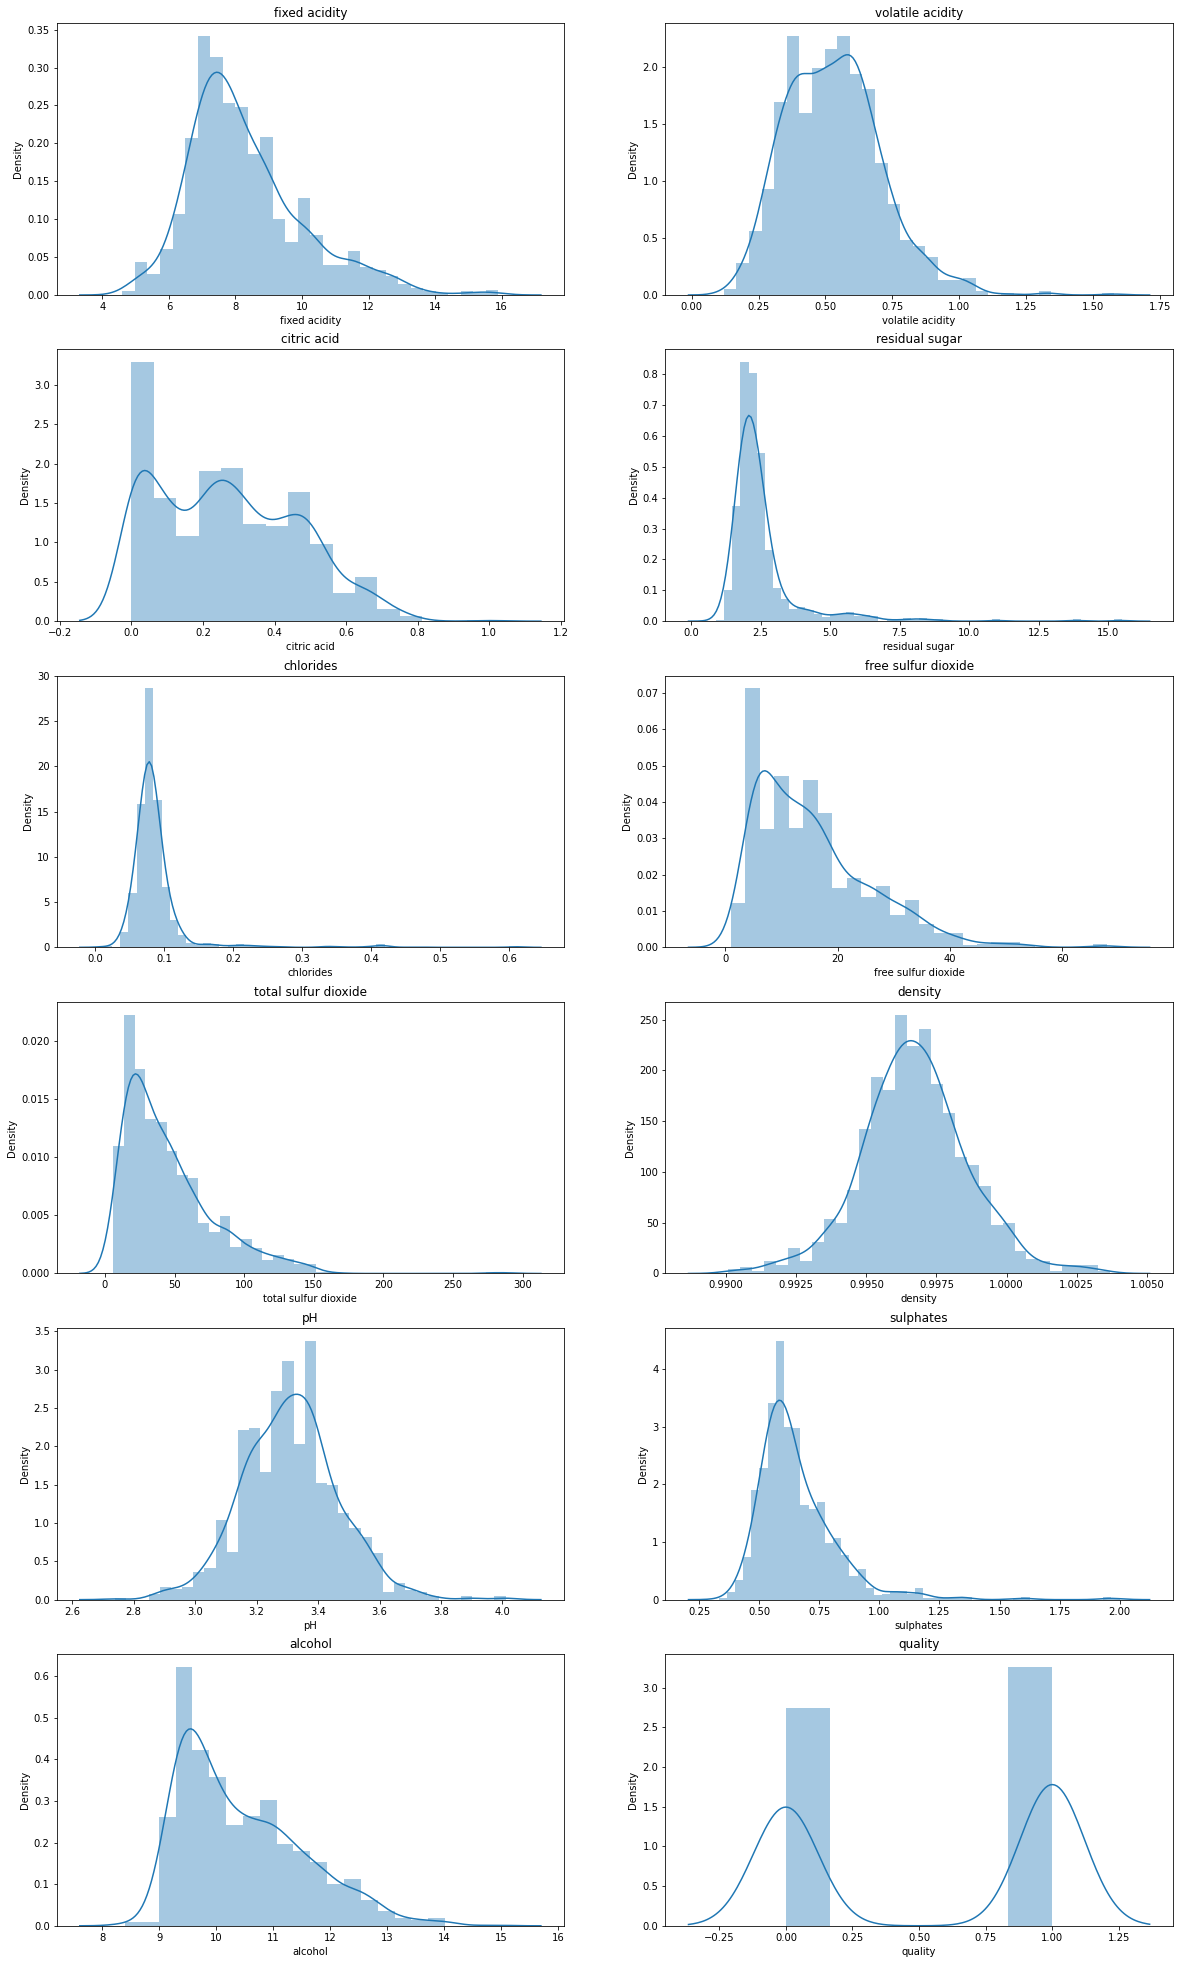

In [5]:
#Hacemos un histograma de todas las variables
# Primero creamos una variable con todas la columnas de mi df
cols= vino.columns

#Creamos una figura con 2 columnas y con las filas acorde al número de columnas que tengo divividido entre 2 (me estoy generando los espacios para plotear cada una de las distribuciones)
fig, ax =plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols =2, figsize = (20,35))

#Recorremos cada una de las columnas y ploteamos
i,j = 0,0
for c in cols:
      sns.distplot(vino[c], hist=True, kde=True, ax= ax[i, j])
      ax[i,j].set_title(c)  # Añadimos un título a cada subploter
      
      j +=1
      if j==2:
            i+=1
            j=0
      


Medimos el skewness y la kurtosis de cada variable:

      - El skewness es una medida de la asimetría. Un conjunto de datos simétrico posee skewness=0, al igual que una distribución normal.
      - La kurtosis es una medida de las colas de la distribución. Cuanto mayor peso tengan las colas, mayor es la kurtosis. Kurtosis =0 se aproximaría a una distribución normal.


In [7]:
for c in cols:
      print(f"------{c}------")
      print("skewness: %f" % vino[c].skew())
      print("kurtosis: %f" % vino[c].kurt())

------fixed acidity------
skewness: 1.044930
kurtosis: 1.384614
------volatile acidity------
skewness: 0.681547
kurtosis: 1.375531
------citric acid------
skewness: 0.371561
kurtosis: -0.714686
------residual sugar------
skewness: 4.361096
kurtosis: 27.675366
------chlorides------
skewness: 6.026360
kurtosis: 47.078324
------free sulfur dioxide------
skewness: 1.231261
kurtosis: 1.932170
------total sulfur dioxide------
skewness: 1.665766
kurtosis: 5.098748
------density------
skewness: 0.102395
kurtosis: 0.888123
------pH------
skewness: 0.221138
kurtosis: 0.925791
------sulphates------
skewness: 2.497266
kurtosis: 12.017377
------alcohol------
skewness: 0.863313
kurtosis: 0.221179
------quality------
skewness: 0.286792
kurtosis: 0.314664


No me imprime el skeness del ph, así que lo hago a parte... 

In [ ]:
vino['pH'].skew()

0.22113839209685748

Graficamos los subplots con la distribución de cada variable, pero según la distinta calidad del vino.
 **Importante** : Con tantos datos es mejor no plantearse un pairplot ya que me saldría una cosa poco legible y solo podría sacar conclusiones de un histograma.

In [23]:
vino.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\roosf\AppData\Local\Temp\ipykernel_15860\81459832.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino.query('quality ==0')[c], hist=True, kde=True, ax= ax[i, j], label='Malo')
C:\Users\roosf\AppData\Local\Temp\ipykernel_15860\81459832.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

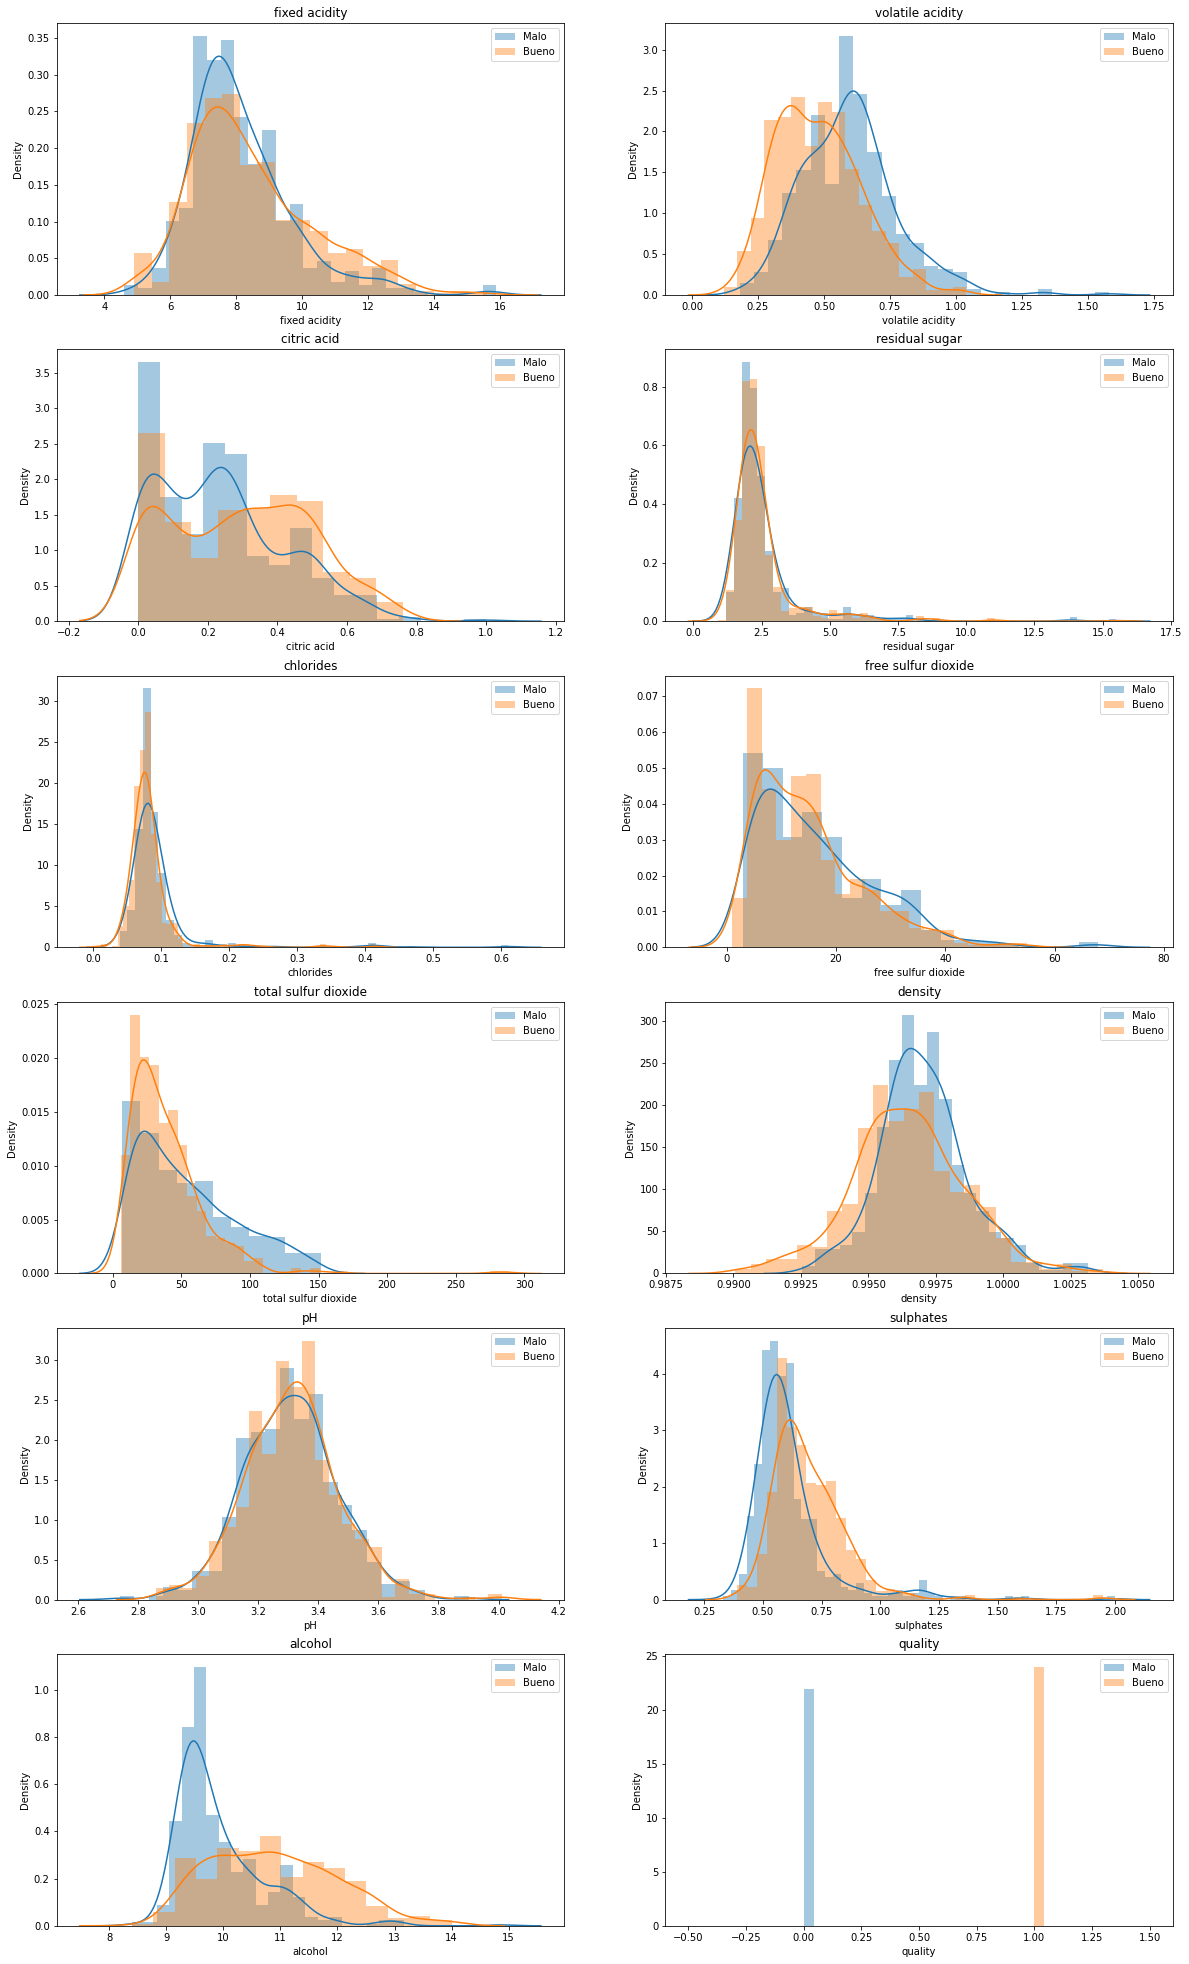

In [30]:
cols= vino.columns

#Creamos una figura con 2 columnas y con las filas acorde al número de columnas que tengo divividido entre 2 (me estoy generando los espacios para plotear cada una de las distribuciones)
fig, ax =plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols =2, figsize = (20,35))

#Recorremos cada una de las columnas y ploteamos
i,j = 0,0
for c in cols:
      sns.distplot(vino.query('quality ==0')[c], hist=True, kde=True, ax= ax[i, j], label='Malo')
      sns.distplot(vino.query('quality==1')[c], hist=True, kde= True, ax= ax[i,j], label='Bueno')
      
      ax[i,j].set_title(c)# Añadimos un título a cada subploter
      ax[i,j].legend()
      j +=1
      if j==2:
            i+=1
            j=0
      



Observando la gráfica, podemos sacar algunas conclusiones interesantes:
- El ph en ambas calidades es muy parecido
- El alcohol es mayor en vinos de mejor calidad y está más repartido; Un alto % de vino de mala calidad no son muy alcohólicos.
- Existe mucha similitud en los sulfatos, azúcar residual, ph, densidad, acidez fija, entre ambos vinos.
- El dióxido de azufre total es mayor en vinos de mejor calidad, mientras que el dióxido de azufre libre es mayor en vinos de peor calidad.
- Los niveles de cloruro son mayores en vinos de baja calidad en comparación con los de alta.
- El ácido cítrico es mayor en vinos de peor calidad.
- La acidez volátil  es mayor en vinos de peor calida.

Viendo estas gráficas, no podemos asegurar que exista actualmente un valor muy diferenciador de la calidad del vino, salvo en el caso de la acidez volátil, pero tampoco es algo muy notorio.



#  7. Vemos los valores anómalos(=outliers).
      Para ello vamos a usar gráficos de cajas (boxplots)

In [5]:
import pathlib

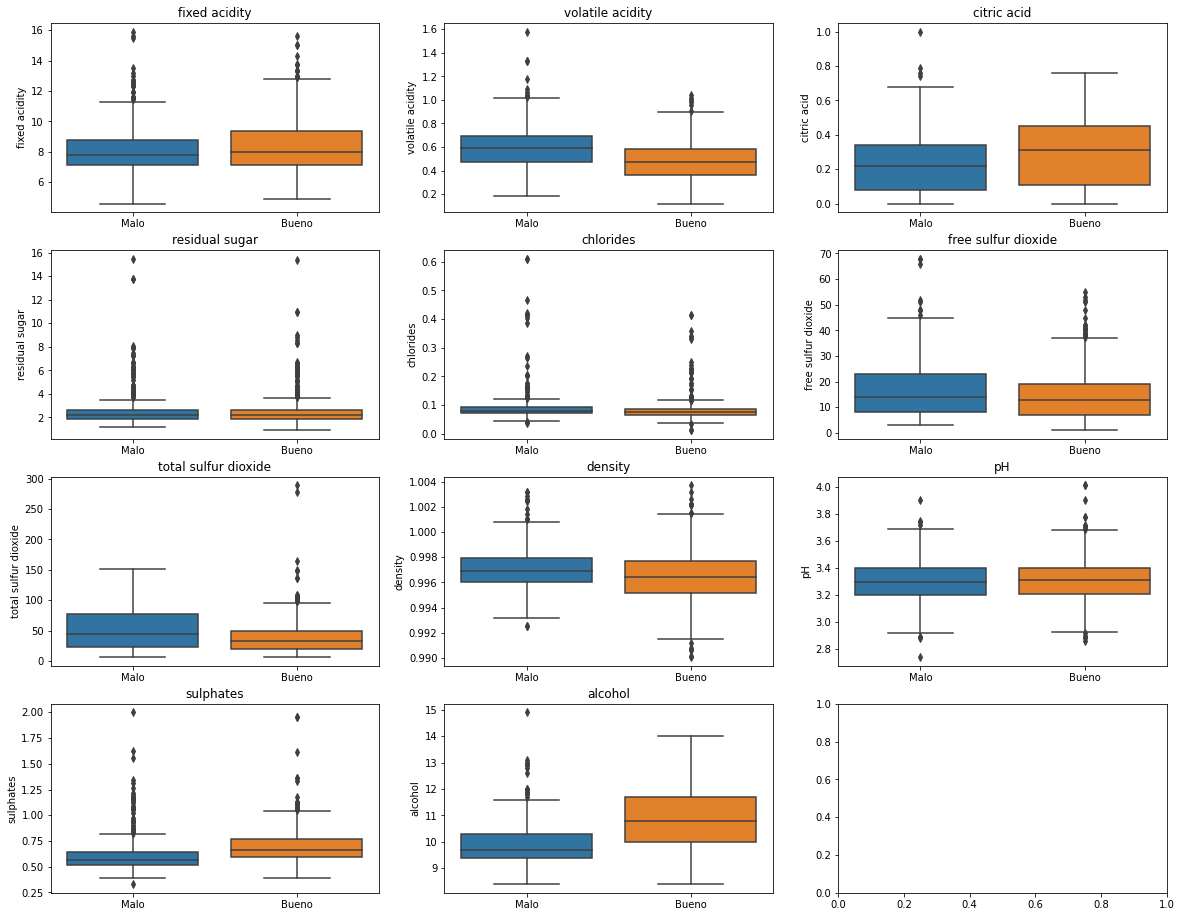

In [15]:

cols= vino.columns
# Primero creamos una figura, en la cual vamos a tener diferentes subplots distribuidos en 3 columnas y filas acordes al número de variables
fig, ax = plt.subplots (nrows=int(np.ceil(len(cols)/3)), ncols=3, figsize=(20,16))

i,j= 0,0 # Creamos los ejes para iterar por todos los valores
for c in cols.delete(-1):
      sns.boxplot(x= 'quality', y=c , data=vino, ax=ax[i,j])
      ax[i,j].set_title(c)
      ax[i,j].set_xlabel('')
      ax[i,j].set_xticklabels(np.array(['Malo', 'Bueno'])) ## Tengo una duda!! cómo garantizo que las etiquetas me las está poniendo bien??, si me baso en un array de np??, primero grafica 0 y luego 1??
      
      j+=1
      if j==3:
            j=0
            i+=1
      
      

En estos boxplots, podemos observar que en el **alcohol**, la diferencia entre vinos buenos y malos es mayor; Al igual que en el caso del **dióxido de azufre total**, hay notoria diferencia entre las calidades de los vinos; Cosa que también ocurre con los **sulfatos**. También podemos contemplar otra variable diferenciadora en la **acidez volátil**, siendo mayor en los vinos de baja calidad.

Si vamos a usar un modelo lineal o parámetrico, los outlaiers cobran mayor importancia. Si usamos un modelo de árboles, los outlairs irán a una rama del arbol, por lo que no será tan importante su detección.


# 7. Correlación entre variables
- Las variables con una alta correlación nos están dando aproximadamente la misma información, por lo que podríamos desprendernos de una de ellas.
- Las variables con una alta correlación con la variable objeto de estudio, serán variables importantes para nuestro modelo.

Es muy buena la visualización de las correlaciones con los heatmap

In [9]:
vino.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.088682
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.330787
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.155144
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,-0.007732
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.100601
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.070577
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.226680
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.154255
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,0.015251
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.234221


Hacemos el heatmap de seaborn, utilizando la correlación de spearman.

C:\Users\roosf\AppData\Local\Temp\ipykernel_13412\1949631778.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(vino_cor, dtype= np.bool))


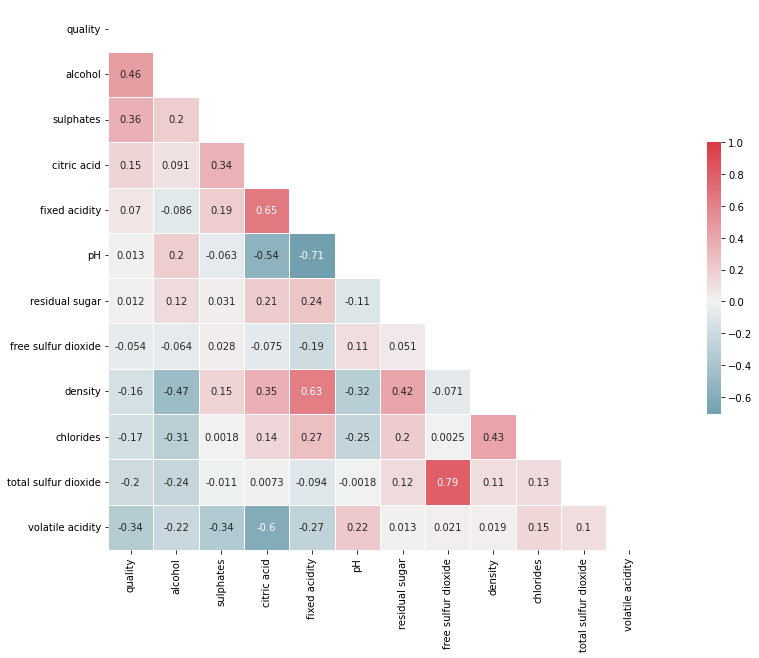

In [32]:
vino_cor= vino.corr('spearman')

vino_cor= vino_cor.sort_values(by = 'quality', axis= 0, ascending=False).sort_values (by= 'quality', axis=1, ascending=False)
mask= np.triu(np.ones_like(vino_cor, dtype= np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
plt.figure(figsize=(20,10))
sns.heatmap(vino_cor.iloc[0:12, 0:12], mask= mask[0:12, 0:12], cmap= cmap, vmax=1, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

Las variables más interesantes, son aquellas que tienen mayor correlación con la variable objeto de estudio. En este caso serán:
- Alcohol, sulfatos, acidez volátil; Las variables que tienen una correlación muy alta entre ellas, podríamos valorar la posibilidad de quedarnos unicamente con una.

# 8. Ingeniería de variables
En este conjunto de datos, se puede obtener nuevas variables a partir de cálculos aritméticos de las variables que disponemos. Y así podemos ver si alguna de estas nuevas columnas que generaremos posee mayor correlación con la variable objeto estudio.
Podemos calcular el "dióxido de azufre combinado" y "acidez total"

"dióxido de azufre combinado"= "dióxido de azufre total"- "dióxido de azufre libre"

"acidez total" = "acidez fija" + "acidez volátil"



In [6]:
vino.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
vino['combined sulfur dioxide']= vino['total sulfur dioxide'] - vino['free sulfur dioxide']

In [8]:
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,combined sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0


In [7]:
vino['total acidity']= vino['fixed acidity'] + vino['volatile acidity']
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,combined sulfur dioxide,total acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,42.0,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,39.0,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,43.0,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0,8.10


Creadas estas nuevas variables, vamos a ver la correlación que tenemos entre la variable objetivo

C:\Users\roosf\AppData\Local\Temp\ipykernel_900\769833213.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(vino_cor, dtype= np.bool))


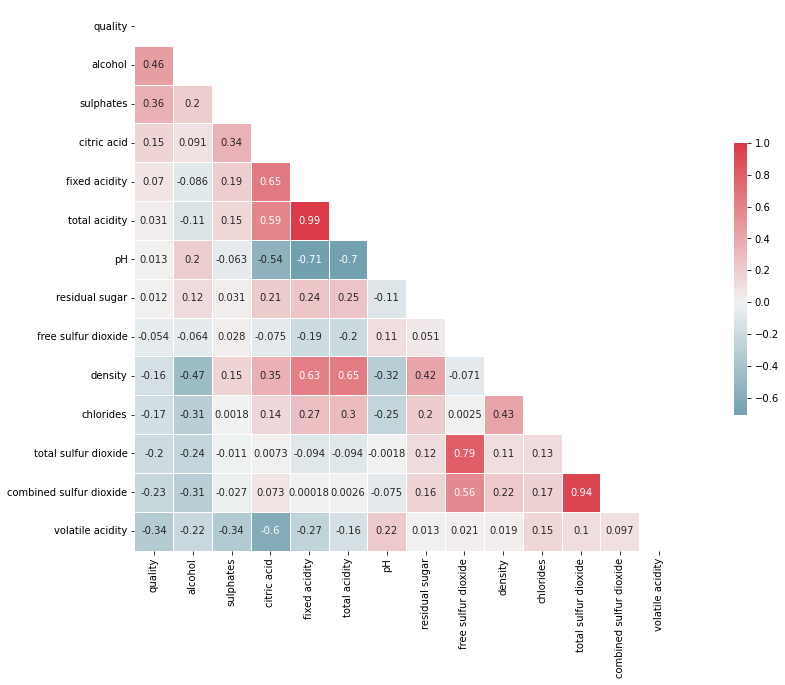

In [11]:
vino_cor= vino.corr('spearman')

vino_cor= vino_cor.sort_values(by = 'quality', axis= 0, ascending=False).sort_values (by= 'quality', axis=1, ascending=False)
mask= np.triu(np.ones_like(vino_cor, dtype= np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
plt.figure(figsize=(20,10))
sns.heatmap(vino_cor.iloc[0:14, 0:14], mask= mask[0:14, 0:14], cmap= cmap, vmax=1, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

Observamos una correlación muy alta con la acidez total y la fija, con lo cual podemos prescindir de una de estas 2 variables. Lo mismo ocurre con el dióxido de azufre total y combinado, podemos prescindir de una de estas 2 variables. Es decir, que si quitamos alguna de estas variables no voy a perder predictividad en mi modelo.
También tenemos mucha correlación entre 'ph' y 'acidez total' y acidez fija
Vamos a hacer gráficos joinplot para ver la correlación de estas variables

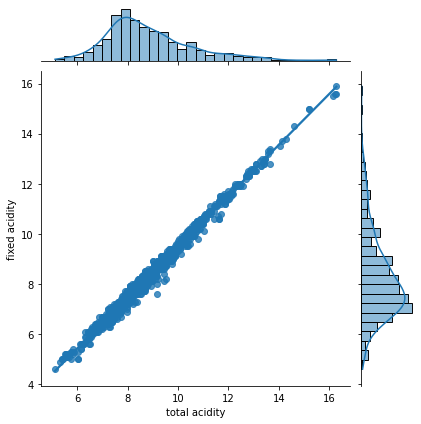

In [12]:
sns.jointplot(x='total acidity', y='fixed acidity', data=vino, kind='reg')


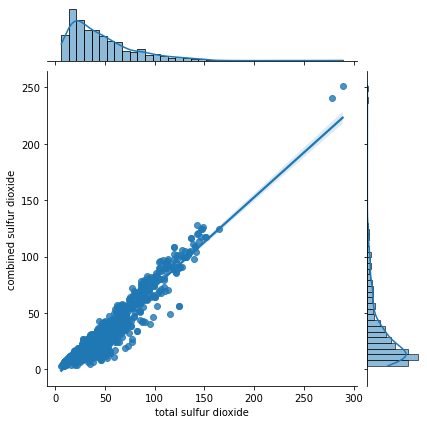

In [11]:

sns.jointplot(x= 'total sulfur dioxide', y='combined sulfur dioxide', data=vino, kind='reg')
      

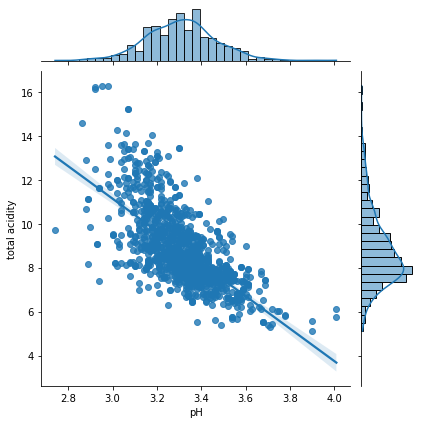

In [15]:
sns.jointplot(x='pH', y='total acidity', data=vino, kind='reg')

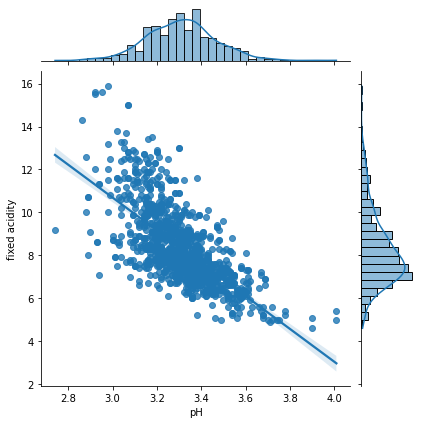

In [16]:
sns.jointplot(x='pH', y='fixed acidity', data=vino, kind='reg')

# 9.Normalización de distribuciones

Cuanto más normal sea la distribución de una variable, mucho mejor serán los resultados para el estudio y las predicciones.
Para conseguir que algunas variables se ajusten más a una distribución normal podemos aplicar métodos como el logaritmo de dicha variable y así la correlación puede mejorar con respecto a la variable objetivo.
En este caso, vamos a probar con las variables que consideramos más importantes para el estudio: 'alcohol', 'sulphates', 'volatile acidity'.
Previamente graficamos su distribución sin aplicar el logaritmo. Seguidamente creamos una nueva variable en la que hemos hecho el logaritmo. De esta manera podemos apreciar claramente la diferencia en la distribución y la nueva correlación con la variable objeto de estudio.

0.8633132317223615
0.22117896845525786


C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\1867694880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['alcohol'], hist=True, kde=True)


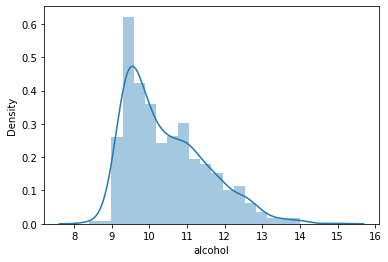

In [20]:
sns.distplot(vino['alcohol'], hist=True, kde=True)
print(vino['alcohol'].skew())
print(vino['alcohol'].kurt())

In [23]:
# Aplicamos logaritmo, creando así una nueva variable
vino['alcohol_log']=np.log(vino['alcohol'])


C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\1853638816.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['alcohol_log'], hist=True, kde=True)


0.6601102588047758
-0.28031839060175257


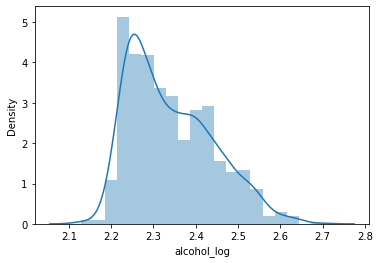

In [24]:
# Graficamos la distribución de la nueva variable
sns.distplot(vino['alcohol_log'], hist=True, kde=True)
print(vino['alcohol_log'].skew())
print(vino['alcohol_log'].kurt())

Observamos cómo ha habido una mejora en la distribución de la variable. Aunque no de una manera muy significativa

2.497266051332364
12.017377028997274


C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\2622899495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['sulphates'], hist=True, kde=True)


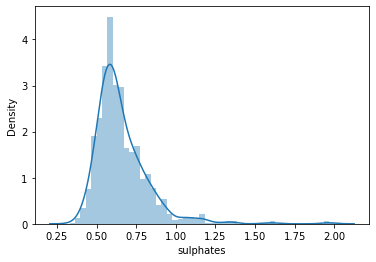

In [21]:
sns.distplot(vino['sulphates'], hist=True, kde=True)
print(vino['sulphates'].skew())
print(vino['sulphates'].kurt())

In [26]:
vino['sulphates_log']=np.log(vino['sulphates'])

C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\1492670315.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['sulphates_log'], hist=True, kde=True)


0.9786876534999843
2.296888252384657


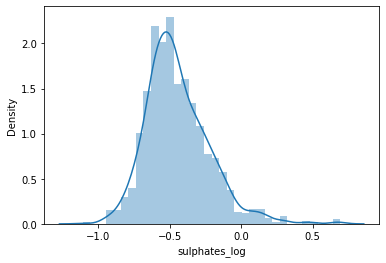

In [27]:
sns.distplot(vino['sulphates_log'], hist=True, kde=True)
print(vino['sulphates_log'].skew())
print(vino['sulphates_log'].kurt())

En el caso de los sulfatos, se ha mejorado notoriamente la distribución

C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\1219864897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['volatile acidity'], hist=True, kde=True)


0.6815474143781255
1.3755312990014108


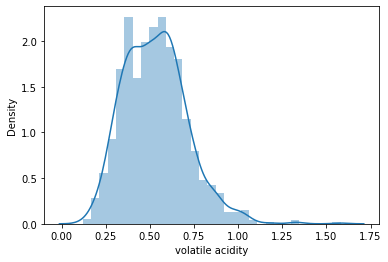

In [28]:
sns.distplot(vino['volatile acidity'], hist=True, kde=True)
print(vino['volatile acidity'].skew())
print(vino['volatile acidity'].kurt())

In [29]:
vino['volatile acidity_log']=np.log(vino['volatile acidity'])

C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\3222148380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vino['volatile acidity_log'], hist=True, kde=True)


-0.44182028861635275
0.3387026818911738


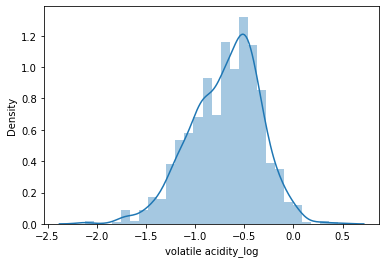

In [30]:
sns.distplot(vino['volatile acidity_log'], hist=True, kde=True)
print(vino['volatile acidity_log'].skew())
print(vino['volatile acidity_log'].kurt())

Al igual que en el caso anterior, la distribución ha mejorado.
Ahora vamos a ver la correlación de estas nuevas variables con la variable objeto de estudio. Para ello hacemos el heatmap

C:\Users\roosf\AppData\Local\Temp\ipykernel_12180\3334428340.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(vino_cor, dtype= np.bool))


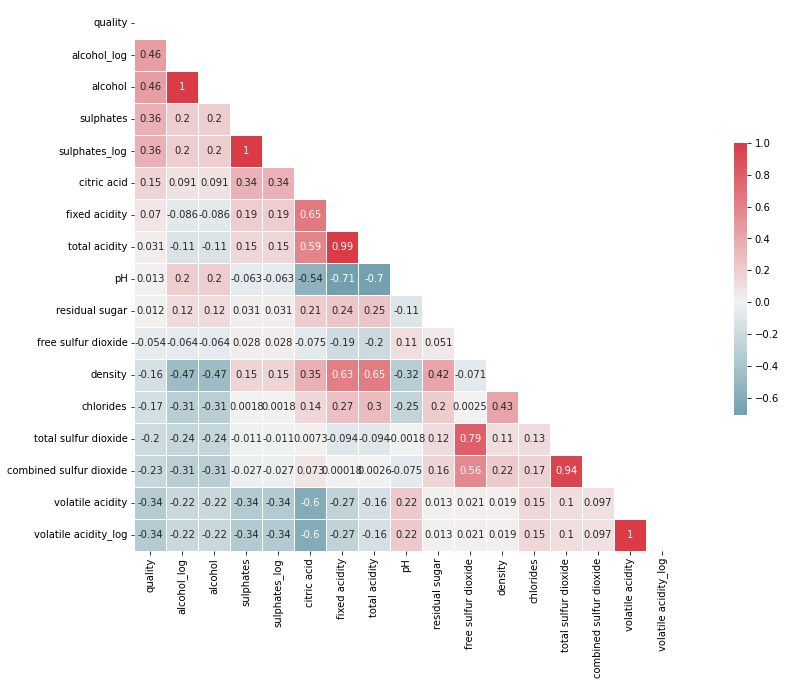

In [32]:
vino_cor= vino.corr('spearman')

vino_cor= vino_cor.sort_values(by = 'quality', axis= 0, ascending=False).sort_values (by= 'quality', axis=1, ascending=False)
mask= np.triu(np.ones_like(vino_cor, dtype= np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
plt.figure(figsize=(20,10))
sns.heatmap(vino_cor.iloc[0:17, 0:17], mask= mask[0:17, 0:17], cmap= cmap, vmax=1, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

En este caso, la correlación no ha mejorado nada.

# 10. Importancia de variables

Para ello lo vamos a hacer de 2 maneras:
1. Empleando un modelo basado en árboles, ya que ofrecen el cálculo de la importancia de variables.
2. Calcularlo mediante sklearn con select from model

In [33]:
#Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
# con train_test_split divide el conjunto de datos en una parte de entrenamiento del modelo (train) y en otra de comprobación (test)
from sklearn.tree import DecisionTreeClassifier


In [54]:
# Generamos el train_test_split del conjunto de datos con un 70% de los datos para entrenamiento y un 30% para la parte test
train, test = train_test_split(vino, test_size=0.3, stratify= vino['quality'], random_state=1200) #random_state es una semilla que le ponemos para que los datos que usa en el entrenamiento sean siempre los mismos y no se modifiquen cada vez que los ejecute
X_train =train.drop('quality', axis=1) #Elimino de la parte de entrenamiento la variable estudio, ya que va a estar en el eje de las y, me genero una nueva variable solamente con 'quality'
y_train = train['quality'] 

#Hacemos lo mismo hacemos con la parte del test.
X_test = test.drop('quality', axis=1)
y_test = test['quality']


In [48]:
# Verificamos que se han repartido los valores entre el train y el test, así como el rep

X_train.shape

(800, 16)

In [47]:
X_test.shape

(343, 16)

In [45]:
vino.shape

(1143, 17)

### 1. Basado en árboles

In [57]:
vino_arbol = DecisionTreeClassifier(max_depth=3, random_state=1200)
vino_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1200)

In [58]:
# Podemos ver la importancia de las variables: Si el valor es 0 el árbol no le ha dado importancia, y cuanto mayor sea el número mayor importancia tendrá
vino_arbol.feature_importances_

array([0.        , 0.05998705, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09990983,
       0.60936238, 0.10357089, 0.        , 0.        , 0.12716985,
       0.        ])

In [70]:
# Vemos a qué variables corresponden estos valores, para ello nos creamos una variable, y filtramos unicamente las que sean mayor de 0
vino_arbol_importancia= pd.Series(vino_arbol.feature_importances_, index= X_train.columns)
arbol= vino_arbol_importancia[vino_arbol_importancia > 0].sort_values()
arbol

volatile acidity           0.059987
sulphates                  0.099910
combined sulfur dioxide    0.103571
sulphates_log              0.127170
alcohol                    0.609362
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

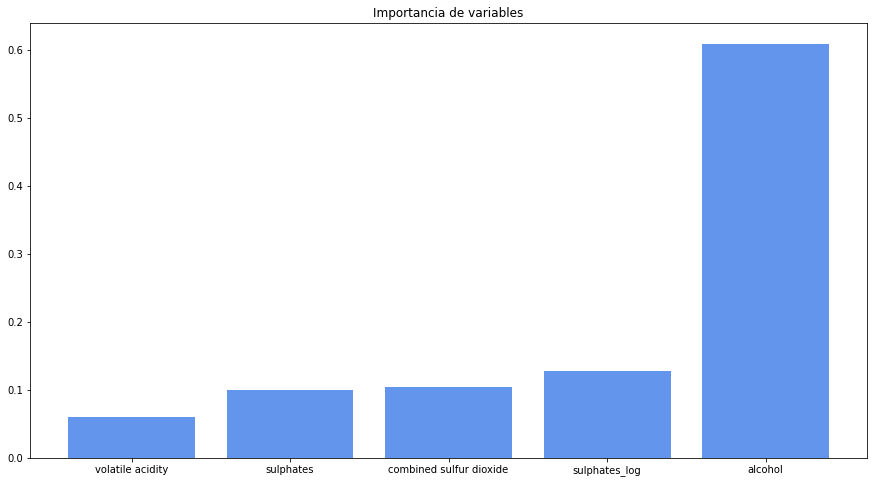

In [71]:
# Vamos a graficar estas variables en un gráfico de barras
fig, ax= plt.subplots(figsize= (15,8))
ax.bar(x= arbol.index, height=arbol.values, color='cornflowerblue')
ax.set_title('Importancia de variables')


### 2. SelectFromModel

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [73]:
# Me genero un modelo
lr = LogisticRegression()
# Generamos un estimador, y entrenamos el modelo
esfm = SelectFromModel(estimator=lr)
esfm.fit(X_train, y_train)

c:\Users\roosf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression())

In [74]:
# Accedemos a los coeficientes de la regresión logística
esfm.estimator_.coef_

array([[ 0.61165081, -1.18042313, -1.54278602, -0.00752507, -0.57602219,
         0.00921968, -0.00277041, -0.65934276, -1.44099112,  0.00904016,
         0.97277491, -0.01199009, -0.56877232, -0.7943905 ,  2.02204176,
        -0.89398939]])

In [76]:
# Vemos a qué variable corresponden estos valores
vino_sfm= pd.Series(esfm.estimator_.coef_[0], index= X_train.columns)
vino_sfm

fixed acidity              0.611651
volatile acidity          -1.180423
citric acid               -1.542786
residual sugar            -0.007525
chlorides                 -0.576022
free sulfur dioxide        0.009220
total sulfur dioxide      -0.002770
density                   -0.659343
pH                        -1.440991
sulphates                  0.009040
alcohol                    0.972775
combined sulfur dioxide   -0.011990
total acidity             -0.568772
alcohol_log               -0.794390
sulphates_log              2.022042
volatile acidity_log      -0.893989
dtype: float64

In [75]:
# Este select from model  tiene un método que me da booleanos, en el que True son variables predictivas y False no los usa
esfm.get_support()

array([False,  True,  True, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True])

In [79]:
# Visualizamos las variables cuyo get_support es unicamente True, pues es la que realmente ha usado el método. Son las variables importantes
var_selec = vino_sfm[esfm.get_support()].sort_values() #get_support() y que no contenga nada por defecto tiene el valor True
var_selec

citric acid            -1.542786
pH                     -1.440991
volatile acidity       -1.180423
volatile acidity_log   -0.893989
alcohol_log            -0.794390
alcohol                 0.972775
sulphates_log           2.022042
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

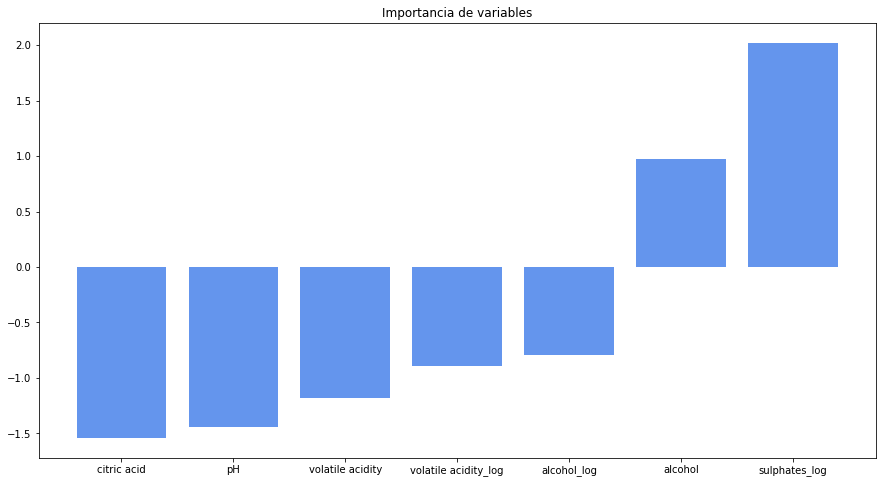

In [80]:
#graficamos 
fig, ax= plt.subplots(figsize= (15,8))
ax.bar(x= var_selec.index, height=var_selec.values, color='cornflowerblue')
ax.set_title('Importancia de variables')


Text(0.5, 1.0, 'Importancia de variables')

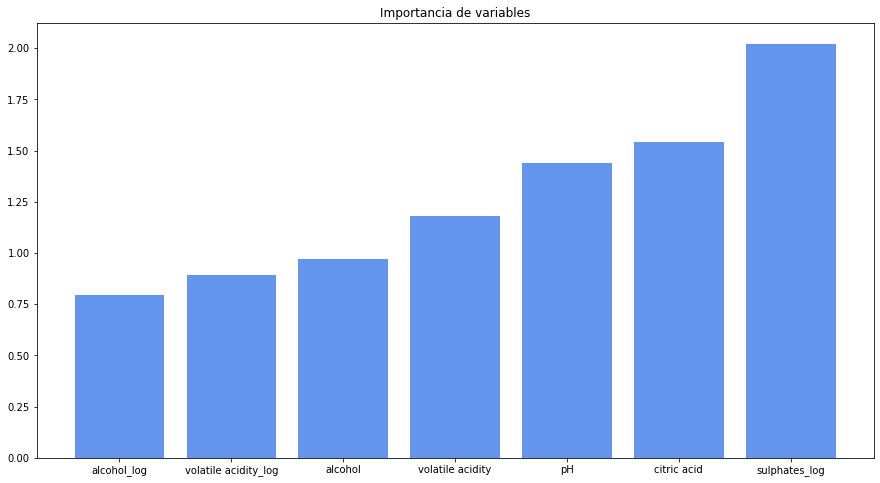

In [83]:
# Para mejorar la visualización ponemos el resultado en valor absoluto y graficamos
vino_select=var_selec.abs().sort_values()
fig, ax= plt.subplots(figsize= (15,8))
ax.bar(x= vino_select.index, height=vino_select.values, color='cornflowerblue')
ax.set_title('Importancia de variables')
